In [4]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image
import seaborn as sns
sns.set()

In [5]:
# image = Image.open("images/elon.jpeg")
# mask = Image.open("images/mask.jpeg")
# mask_2 = Image.open("images/second_mask.jpeg")
image = cv2.imread("images/cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170, 224, 410]] # Bounding  box (x_min, y_min, x_max, y_max)


In [6]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        # If you don't want to have reflections after rotation
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.1),
        A.VerticalFlip(0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
        A.OneOf(# Choose random transformation
            [
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.5),
                
            ], p=1.0), # Chance to use one of these transforms 
     ], bbox_params=A.BboxParams(format="pascal_voc", label_fields=[]) # Also can be YOLO, COCO
)

In [7]:
images_list = [image]
saved_bboxes = [bboxes[0]]
for _ in range(4):
    augmentation = transform(image=image, bboxes=bboxes) # mask=mask
    augmented_img = augmentation["image"]
    images_list.append(augmented_img)
    saved_bboxes.append(augmentation["bboxes"][0])

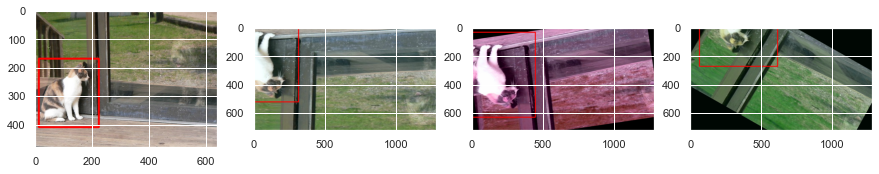

In [8]:
plot_examples(images_list, saved_bboxes)

In [9]:
print(augmentation)

{'image': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 'bboxes': [(696.1497090820507, 76.45397358431427, 1280.0, 720.0)]}
